# University of science
## Advanced Machine Learning - Lab 01 - Introduce Tensorflow
## Nguyễn Quốc Bảo - 18110053

Lab-01

Ở bài thực hành đầu tiên này chúng ta sẽ làm quen với cách thức một neural network hoạt động. Thường sẽ có nhiều loại mã nguồn mở cho deep learning tiêu biểu là Tensorflow và Pytorch. Trong suốt quá trình học chúng ta sẽ thực hành trên Keras một thư viện high-level với phần low-level là Tensorflow

In [1]:
#Thư viện
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
from sklearn.model_selection import train_test_split

In [2]:
#xem mình đang dùng tensorflow version mấy 
tf.__version__

'2.6.0'

Chúng ta sẽ làm quen với tập dữ liệu fashion_mnist. Đây là một tập dữ liệu bao gồm hình ảnh về quần áo, với mỗi ảnh gồm 3 kênh màu có giá trị pixel từ 0 đến 255.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images ,test_labels)=fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#chia tập train ra thành 2 tập train và validation
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, 
                                                                          random_state=0,
                                                                          test_size=0.1)

In [5]:
print('Set of Training: ',train_images.shape)
print('Set of Validation: ',valid_images.shape)
print('Set of Testing: ', test_images.shape)

Set of Training:  (54000, 28, 28)
Set of Validation:  (6000, 28, 28)
Set of Testing:  (10000, 28, 28)


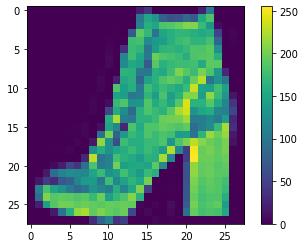

In [6]:
#Vẽ hình ra xem thử
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1_score(y_true, y_pred):
    precision_m = precision(y_true, y_pred)
    recall_m = recall(y_true, y_pred)
    return 2*((precision_m * recall_m)/(precision_m + recall_m + K.epsilon()))

# Bài tập
1. Hãy tạo một model có cấu trúc sau và train thử:
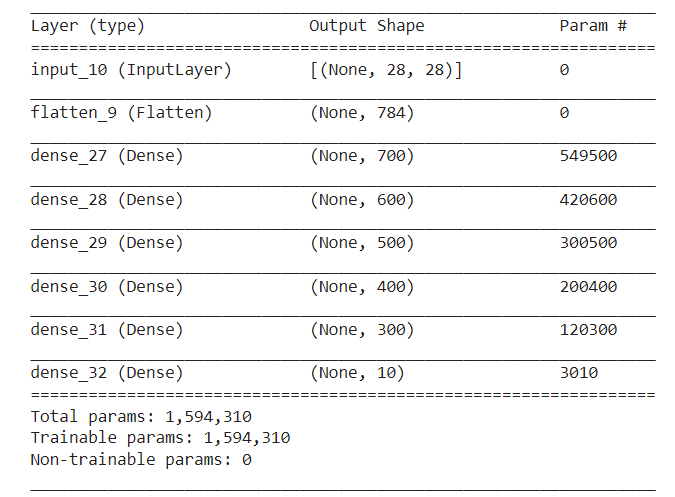

In [8]:
def build_model(optimizer, loss_fn, metrics):
    # define model
    Input = tf.keras.layers.Input(shape=(28,28)) # Định nghĩa input shape cho model
    Flatten = tf.keras.layers.Flatten()(Input)   # Duỗi thẳng ảnh ra thành 1 vector
    Dense1 = tf.keras.layers.Dense(units=700, activation="relu")(Flatten) # Định nghĩa số node cho lớp FC, dùng activation là relu
    Dense2 = tf.keras.layers.Dense(units=600, activation="relu")(Dense1)
    Dense3 = tf.keras.layers.Dense(units=500, activation="relu")(Dense2)
    Dense4 = tf.keras.layers.Dense(units=400, activation="relu")(Dense3)
    Dense5 = tf.keras.layers.Dense(units=300, activation="relu")(Dense4)
    Output = tf.keras.layers.Dense(units=len(np.unique(train_labels)), activation="softmax")(Dense5) # Đây là lớp classifier của model, với số nodes đúng bằng số labels 

    model= tf.keras.models.Model(inputs=Input, outputs=Output)

    # compile model
    model.compile(optimizer = optimizer,loss = loss_fn ,metrics= metrics)
    #In thử model ra để xem cấu trúc
    print('model structure: ')
    print(model.summary())
    return model

In [9]:
#optimizer là chọn optimizer cho model
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
#loss là chọn loss function cho model
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
#metrics là chọn metrics cho model
metrics = ["accuracy", F1_score]

model_2 = build_model(optimizer, loss_fn, metrics)

model structure: 
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 700)               549500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               420600    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 300)   

2. cách tính số Param #

param của lớp Fully connected là bằng input*output, ngoài ra thêm bias cho mỗi node output => (input + 1)*output.
* Input: đầu vào với chiều (28 x 28) nên ko có param.
* flatten: đưa input thành 1 chiều 28 x 28 = 784, nên ko có param.
* D1: (784 + 1)*700 = 549500
* D2: (700 + 1)*600 = 420600
* D3: (600 + 1)*500 = 300500
* D4: (500 + 1)*400 = 200400
* D5: (400 + 1)*300 = 120300
* Ouput: lớp classifier với 10 node, (300 + 1)*10 = 3010

In [10]:
def model_train(model, train, train_labels, valid, valid_labels, n_epoch = 20, batch_size = None, verbose = 1):
    model.fit(x=train, y=train_labels,
              epochs= n_epoch,
              verbose = verbose,
              batch_size = batch_size,
              validation_data= (valid, valid_labels) )
    
model_train(model_2, train_images, train_labels, valid_images, valid_labels, n_epoch = 20)

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 1.5000 - accuracy: 0.7477 - F1_score: 0.9868 - val_loss: 0.7370 - val_accuracy: 0.7945 - val_F1_score: 0.9815
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.6535 - accuracy: 0.8126 - F1_score: 0.9810 - val_loss: 0.6825 - val_accuracy: 0.8062 - val_F1_score: 0.9789
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5250 - accuracy: 0.8363 - F1_score: 0.9801 - val_loss: 0.6579 - val_accuracy: 0.7972 - val_F1_score: 0.9778
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4584 - accuracy: 0.8513 - F1_score: 0.9788 - val_loss: 0.5327 - val_accuracy: 0.8378 - val_F1_score: 0.9805
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4127 - accuracy: 0.8611 - F1_score: 0.9789 - val_loss: 0.5198 - val_accuracy: 0.8445 - val_F1_score: 0.9780
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - 

3. Tính độ chính xác trên tập test

In [11]:
def evaluate_model(model, test, test_labels):
    #Xem độ chính xác trên tập test
    evaluation = model.evaluate(test, test_labels, verbose=1)
    print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))
evaluate_model(model_2, test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4830 - accuracy: 0.8475 - F1_score: 0.9831
Model có độ chính xác là 0.8475000262260437 và loss là 0.4830239713191986
